In [1]:
%matplotlib inline
import os
os.environ['PSRAD_PATH'] = '/scratch/uni/u237/users/lkluft/icon-aes/psrad/'

import numpy as np
import matplotlib.pyplot as plt
import typhon
import conrad
from netCDF4 import Dataset


plt.style.use(typhon.plots.styles('typhon'))

In [2]:
def linear_profile(z, Ts=300, lrate=0.0065):
    return Ts - lrate * z

results/tropical-standard/scale-co2-fixedVMR/tropical-standard_scale-co2-fixedVMR_1.nc


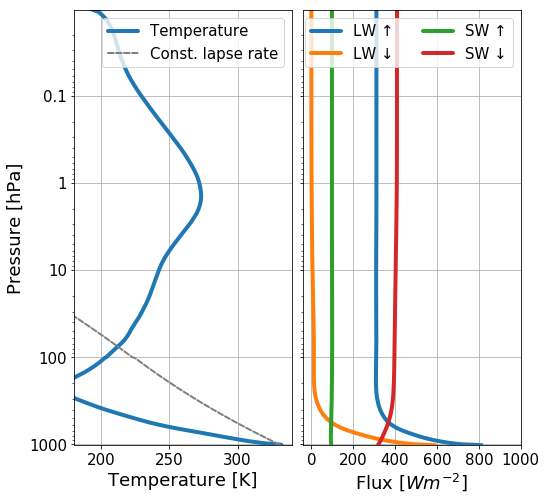

In [3]:
inputfile = conrad.utils.get_filepath(
    atmosphere='tropical-standard',
    experiment='scale-co2-fixedVMR',
    scale='1',
)
# inputfile = 'results/tropical-moistconvective_scale-co2-moistconvective_1.nc'
print(inputfile)
data = Dataset(inputfile)

timestep = -1 

time = data.variables['time'][:] / 24  # time in days
p = data.variables['plev'][:]
ph = data.variables['phlev'][:]
z = data.variables['z'][timestep, :]
T = data.variables['T'][timestep, :]
dT = data.variables['deltaT'][timestep, :]

net_htngrt = data.variables['net_htngrt'][timestep, :]
lw_flxu = data.variables['lw_flxu'][timestep, :]
lw_flxd = data.variables['lw_flxd'][timestep, :]
sw_flxu = data.variables['sw_flxu'][timestep, :]
sw_flxd = data.variables['sw_flxd'][timestep, :]

fig, [ax, ax2] = plt.subplots(ncols=2, sharey=True, figsize=(8, 8))
fig.subplots_adjust(wspace=0.05)
typhon.plots.profile_p_log(p, T, label='Temperature', ax=ax, linewidth=4)
typhon.plots.profile_p_log(p, linear_profile(z, T[0]),
                           color='grey',
                           linestyle='dashed',
                           label='Const. lapse rate',
                           ax=ax,
                           )
ax.set_ylim(p.max(), p.min())
ax.set_xlim(180, 340)
ax.set_xlabel('Temperature [K]')
ax.grid(True)
ax.legend()

typhon.plots.profile_p_log(ph, lw_flxu, label='LW \u2191', lw=4, ax=ax2)
typhon.plots.profile_p_log(ph, lw_flxd, label='LW \u2193', lw=4, ax=ax2)
typhon.plots.profile_p_log(ph, sw_flxu, label='SW \u2191', lw=4, ax=ax2)
typhon.plots.profile_p_log(ph, sw_flxd, label='SW \u2193', lw=4, ax=ax2)
ax2.set_xticks(range(0, 1001, 200))
ax2.grid(True )
ax2.set_xlabel('Flux [$Wm^{-2}$]')
ax2.legend(ncol=2)

# fig.savefig('plots/fluxes.pdf')

/dev/shm/u237002/anaconda36/envs/python36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


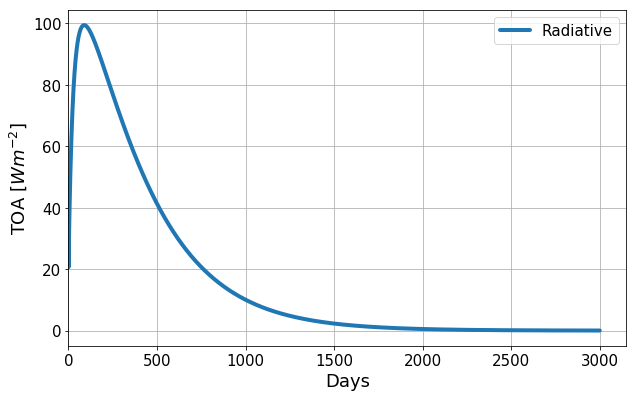

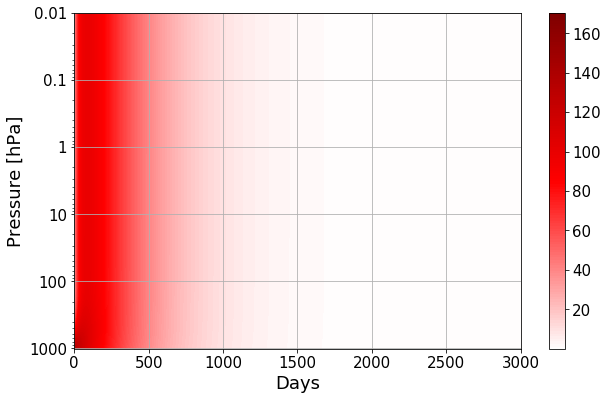

In [4]:
data = Dataset(inputfile)

time = data.variables['time'][:] / 24  # time in days
lw_flxu = data.variables['lw_flxu'][:, -1]
lw_flxd = data.variables['lw_flxd'][:, -1]
sw_flxu = data.variables['sw_flxu'][:, -1]
sw_flxd = data.variables['sw_flxd'][:, -1]

toa = ((sw_flxd + lw_flxd) - (sw_flxu + lw_flxu))

fig, ax = plt.subplots()
ax.plot(time, toa, label='Radiative', linewidth=4)
ax.set_ylabel('TOA [$Wm^{-2}$]')
ax.set_xlabel('Days')
ax.set_xlim(left=0)
ax.legend()
ax.grid(True)
# fig.savefig('plots/toa.pdf')

#
plev = data.variables['plev'][:]
lw_flxu = data.variables['lw_flxu'][:]
lw_flxd = data.variables['lw_flxd'][:]
sw_flxu = data.variables['sw_flxu'][:]
sw_flxd = data.variables['sw_flxd'][:]

radiation_budget = ((sw_flxd + lw_flxd) - (sw_flxu + lw_flxu))

fig, ax = plt.subplots()
sm = ax.pcolormesh(
    time, plev, radiation_budget[:, :-1].T,
    cmap='seismic',
    rasterized=True,
)
cb = fig.colorbar(sm)
typhon.plots.center_colorbar(cb)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(typhon.plots.HectoPascalLogFormatter())
ax.yaxis.set_minor_formatter(typhon.plots.HectoPascalLogFormatter())
ax.set_ylim(plev.max(), plev.min())
#ax.set_ylabel('TOA [$Wm^{-2}$]')
ax.set_ylabel('Pressure [hPa]')
ax.set_xlabel('Days')
ax.set_xlim(left=0)
ax.legend()
ax.grid(True)
# fig.savefig('plots/fluxes.pdf')

/scratch/uni/u237/users/lkluft/conrad/conrad/atmosphere.py:463: RuntimeWarning: divide by zero encountered in true_divide
  lp = -lapse[:].values / (g*density)
/scratch/uni/u237/users/lkluft/conrad/conrad/atmosphere.py:632: RuntimeWarning: divide by zero encountered in true_divide
  lp = -lapse[:].values / (g*density)


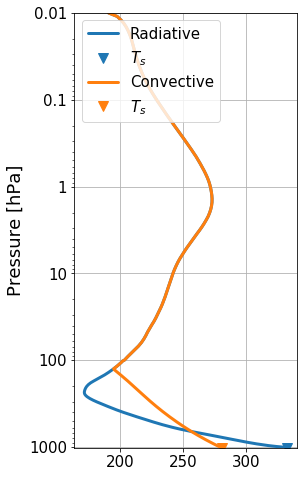

In [5]:
def plot_temperature_profile(atmosphere, timestep=-1, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
        
    lines = typhon.plots.profile_p_log(
        atm['plev'], atm['T'][timestep, :], ax=ax, **kwargs)
    
    ax.grid(True)
    ax.set_ybound(lower=atm['plev'].max(), upper=atm['plev'].min())
    
    return lines


def plot_surface_temperature(surface, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
        
    lines = ax.plot(surface.temperature, surface.pressure,
                    linestyle='none',
                    marker='v',
                    label='$T_s$',
                    **kwargs,
                   )
    
    ax.set_ylim(bottom=surface.pressure)
    
    return lines
    

atm = conrad.atmosphere.AtmosphereConvective.from_netcdf(inputfile, -1)
srf = conrad.surface.SurfaceHeatCapacity.from_atmosphere(atm, cp=10)

fig, ax = plt.subplots(figsize=(4, 8))
plot_temperature_profile(atm, color='C0', linewidth=3, label='Radiative')
plot_surface_temperature(srf, color='C0')

ct = atm.convective_top(srf, 2/24)
atm.convective_adjustment(*ct, srf, 2/24)

plot_temperature_profile(atm, color='C1', linewidth=3, label='Convective')
plot_surface_temperature(srf, color='C1')

ax.legend(loc='upper left')
# ax.set_ylim(top=600e2)

In [6]:
# inputfile = 'results/test.nc'
# timestep = -1
# atm = conrad.atmosphere.AtmosphereConvectiveFlux.from_netcdf(inputfile, timestep)
# srf = conrad.surface.SurfaceHeatCapacity.from_netcdf(inputfile, timestep)
# 
# 
# fig, ax = plt.subplots(figsize=(4, 8))
# plot_temperature_profile(atm, label='Radiative', ax=ax)
# ax.grid(True)

results/renew_advanced_800.nc: Surface temperature 304.31 K
results/renew_simple_800.nc: Surface temperature 304.31 K


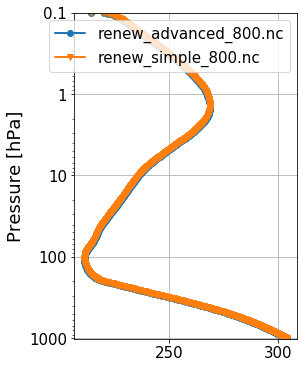

In [7]:
from os.path import basename
from matplotlib import markers
from matplotlib.lines import Line2D


MarkerIterator = (m for m in Line2D.filled_markers)


fig, ax = plt.subplots(figsize=(4, 6))
for ncfile in glob.iglob('results/renew_*_800.nc'):
    data = Dataset(ncfile)
    plev = data.variables['plev'][:]
    T = data.variables['T'][-1, :]
    
    typhon.plots.profile_p_log(
        plev, T,
        ax=ax,
        label=basename(ncfile),
        linewidth=2,
        markersize=6,
        marker=next(MarkerIterator),
    )
    
    Ts = float(data.variables['temperature'][-1])
    print(f'{ncfile}: Surface temperature {Ts:.2f} K')
    
ax.grid(True)
ax.legend()
#ax.set_ylim(bottom=1013e2, top=100e2)
#ax.set_ylim(bottom=0.25e2, top=0.1e2)
ax.set_ylim(bottom=1013e2, top=0.1e2)
fig.savefig('test3.pdf')

(101300.0, 10.0)

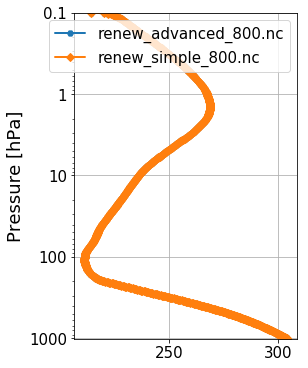

In [12]:
fig, ax = plt.subplots(figsize=(4, 6))
for ncfile in glob.iglob('results/renew_*_800.nc'):
    atmosphere = conrad.atmosphere.AtmosphereMoistConvective.from_netcdf(ncfile)
    
    plev = atmosphere['plev'][:]
    T = atmosphere['T'][-1, :]
    
    
    typhon.plots.profile_p_log(
        plev, T,
        ax=ax,
        label=basename(ncfile),
        linewidth=2,
        markersize=6,
        marker=next(MarkerIterator),
    )
    
ax.grid(True)
ax.legend()
#ax.set_ylim(bottom=1013e2, top=100e2)
#ax.set_ylim(bottom=0.25e2, top=0.1e2)
ax.set_ylim(bottom=1013e2, top=0.1e2)